In [30]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [32]:
#Import seattle data
seattlehprices = pd.read_csv('/Users/morganscafidi/Documents/GitHub/geospatial-data-science/labs/lab5/lab5/seattle_house_prices.csv')
#Import seattle coast line data
coast = gpd.read_file('/Users/morganscafidi/Documents/GitHub/geospatial-data-science/labs/lab5/lab5/washington_coastline.shp')

In [33]:
# How many houses are in this dataset? 
# There are 19,451 houses in this dataset.
seattlehprices

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long
0,538000,3,2.25,2570,7242,1951,47.7210,-122.319
1,180000,2,1.00,770,10000,1933,47.7379,-122.233
2,604000,4,3.00,1960,5000,1965,47.5208,-122.393
3,510000,3,2.00,1680,8080,1987,47.6168,-122.045
4,1230000,4,4.50,5420,101930,2001,47.6561,-122.005
...,...,...,...,...,...,...,...,...
19446,475000,3,2.50,1310,1294,2008,47.5773,-122.409
19447,360000,3,2.50,1530,1131,2009,47.6993,-122.346
19448,400000,4,2.50,2310,5813,2014,47.5107,-122.362
19449,400000,3,2.50,1600,2388,2004,47.5345,-122.069


In [34]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(seattlehprices, geometry=gpd.points_from_xy(seattlehprices['long'], seattlehprices['lat']))
gdf = gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm = gdf.to_crs('EPSG:32610')
coast_utm = coast.to_crs('EPSG:32610')

In [35]:
# Compute distance to coast
distance_to_coast = []
for i in range(gdf_utm.shape[0]):
    distance_to_coast.append(coast_utm.distance(gdf_utm['geometry'].iloc[i]).min())
    
# Add to DataFrame
gdf_utm['distance_to_coast'] = distance_to_coast

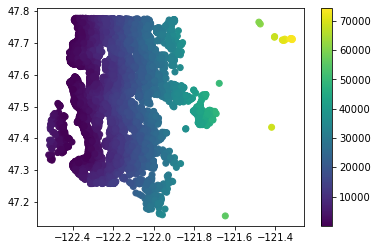

In [51]:
# Quickly check that it worked!
plt.scatter(gdf_utm['long'], gdf_utm['lat'], c=gdf_utm['distance_to_coast'])
plt.colorbar()

In [11]:
# How many features are there for predicting house price?
# There are 8 existing features for predicting house price.

In [56]:
# Are there any null values in this dataset?
# No there are no null values in the dataset
# Check for NaN values and data types
seattlehprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   price        19451 non-null  int64   
 1   bedrooms     19451 non-null  int64   
 2   bathrooms    19451 non-null  float64 
 3   sqft_living  19451 non-null  int64   
 4   sqft_lot     19451 non-null  int64   
 5   yr_built     19451 non-null  int64   
 6   lat          19451 non-null  float64 
 7   long         19451 non-null  float64 
 8   geometry     19451 non-null  geometry
dtypes: float64(3), geometry(1), int64(5)
memory usage: 1.3 MB


In [134]:
# Compute correlation matrix
corr_matrix = seattlehprices.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)


price          1.000000
sqft_living    0.702296
bathrooms      0.524395
bedrooms       0.315804
lat            0.308082
sqft_lot       0.090125
yr_built       0.052453
long           0.020092
Name: price, dtype: float64

In [135]:
# Which three variables are best correlated with house price (include correlation coefficients)?
print('sqft_living @ a correlation coefficent of .70, bathrooms at a correlation coefficient of .52, and bedrooms at a correlation coefficent of .32 are the three highest variables that predict house prices')
print('')
# Which three variables are least correlated with house price (include correlation coefficients)?
print('longitide at a correlation coefficent of .02, yr_built at a correlation coefficent of .05, and sqft_lot at a correlation coefficent of .09 are the three lowest variables that predict house prices ')

sqft_living @ a correlation coefficent of .70, bathrooms at a correlation coefficient of .52, and bedrooms at a correlation coefficent of .32 are the three highest variables that predict house prices

longitide at a correlation coefficent of .02, yr_built at a correlation coefficent of .05, and sqft_lot at a correlation coefficent of .09 are the three lowest variables that predict house prices 


In [13]:
seattlehprices.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long', 'geometry'],
      dtype='object')

In [42]:
#Compute distance to UW Arboretum
#47.63982848173617, -122.29614021004966
from shapely.geometry import Point
geom = Point( -122.28120001226782, 47.6167207495107)
geom_gdf = gpd.GeoDataFrame(geometry = [geom], crs = 4326)
geom_gdf = geom_gdf.to_crs("EPSG:32610")

distance_to_Arboretum = []
for i in range(gdf_utm.shape[0]):
    distance_to_Arboretum.append(geom_gdf.distance(gdf_utm['geometry'].iloc[i]).min())
    
# Add to DataFrame
gdf_utm['distance_to_Arboretum'] = distance_to_Arboretum

In [43]:
#Compute Distance to Bill Gates street
billygate =  Point( -122.23906489686838, 47.61585908737864)
#ParkPoints_gdf = gpd.GeoDataFrame(geometry = [geom], crs = 4326)
billygate_gdf = gpd.GeoDataFrame(geometry = [billygate], crs = 4326)
billygate_gdf = billygate_gdf.to_crs("EPSG:32610")

distance_to_billygate = []
for i in range(gdf_utm.shape[0]):
    distance_to_billygate.append(billygate_gdf.distance(gdf_utm['geometry'].iloc[i]).min())
    
gdf_utm['billygate'] = billygate

In [44]:
#Compute Distance to Park points
#47.65505093674864, -122.30285131857873
ParkPoints =  [Point(-122.30285131857873, 47.65505093674864),Point(-122.27974971735692, 47.621504321576914),Point(-122.32806723371868, 47.68022234431759), Point(-122.25923189707495,47.67624984969383)]
#ParkPoints_gdf = gpd.GeoDataFrame(geometry = [geom], crs = 4326)
ParkPoints_gdf = gpd.GeoDataFrame(geometry = ParkPoints, crs = 4326)
ParkPoints_gdf = ParkPoints_gdf.to_crs("EPSG:32610")

distance_to_parks = []
for i in range(gdf_utm.shape[0]):
    distance_to_parks.append(ParkPoints_gdf.distance(gdf_utm['geometry'].iloc[i]).min())
    
gdf_utm['distance_to_parks'] = distance_to_parks

In [45]:
gdf_utm.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long,distance_to_coast,distance_to_Arboretum,distance_to_parks
count,1.945100e+04,19451.000000,19451.000000,19451.000000,1.945100e+04,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000
mean,5.404634e+05,3.369955,2.114943,2081.149967,1.508406e+04,1971.021438,47.559780,-122.213896,11361.467248,17577.839631,15827.153784
std,3.685123e+05,0.906639,0.769818,918.160494,4.160157e+04,29.363143,0.138783,0.140694,9540.501421,10322.279251,11623.873850
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1900.000000,47.155900,-122.519000,1.284621,67.656932,244.415910
25%,3.210000e+05,3.000000,1.750000,1420.000000,5.042500e+03,1952.000000,47.469500,-122.328000,3286.564007,10076.414958,6311.507022
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1975.000000,47.571700,-122.231000,9544.295888,14706.949034,12642.313741
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.066550e+04,1997.000000,47.677900,-122.125000,16855.592243,23032.664736,22839.251338
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,2015.000000,47.777600,-121.315000,74308.874771,73331.928027,70974.897501


In [53]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price                    1.000000
sqft_living              0.702296
bathrooms                0.524395
bedrooms                 0.315804
lat                      0.308082
sqft_lot                 0.090125
yr_built                 0.052453
sqftperroom              0.048319
distance_to_coast        0.027830
long                     0.020092
bathperbed              -0.252939
distance_to_parks       -0.333526
distance_to_Arboretum   -0.352885
Name: price, dtype: float64

In [68]:
# Rooms per house
#gdf_utm['bathperbed'] = gdf_utm['bedrooms'] / gdf_utm['bathrooms']

In [71]:
# Rooms per house
gdf_utm['sqftperroom'] = gdf_utm['bedrooms'] / gdf_utm['sqft_lot']

In [78]:
# Define feature list
feature_list =  ['sqft_living', 'bathrooms', 
                 'bedrooms', 'lat', 'sqft_lot', 'yr_built', 'sqftperroom', 'distance_to_coast', 'long', 'distance_to_parks','distance_to_Arboretum']

# Define features and labels 
X = gdf_utm[feature_list]
y = gdf_utm['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [79]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [80]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [83]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

148745.9384963235

(0.0, 500000.0)

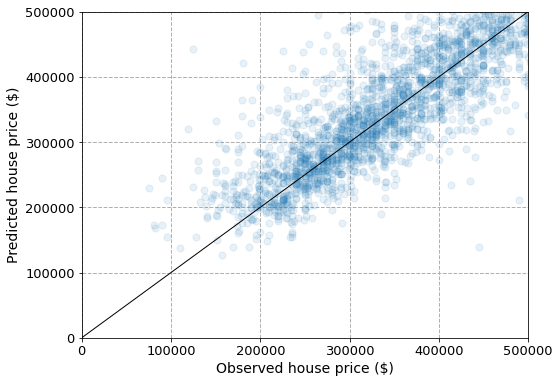

In [84]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

In [137]:
pip install -U notebook-as-pdf

  Using cached notebook_as_pdf-0.5.0-py3-none-any.whl (6.5 kB)
  Using cached pyppeteer-1.0.2-py3-none-any.whl (83 kB)
  Using cached PyPDF2-1.26.0-py3-none-any.whl
  Using cached pyee-8.2.2-py2.py3-none-any.whl (12 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached websockets-10.1-cp38-cp38-macosx_10_9_x86_64.whl (96 kB)
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
Note: you may need to restart the kernel to use updated packages.
